In [87]:
### Import packages for preprocessing

import pandas as pd
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re

### Import packages to create absolute file path & make code independent of operating system

from pathlib import Path
import os.path
import warnings
warnings.filterwarnings("ignore")

### Import packages to visualize data

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/HenriekeMax/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [88]:
### Read in dataset

base_path = Path("__file__").parent

full_path = (base_path / "../../data/raw/stackoverflow_raw_sample.csv").resolve()

stackoverflow = pd.read_csv(os.path.join(full_path))

In [89]:
### stackoverflow = pd.read_csv("/Users/HenriekeMax/Documents/Career_Development/GitHub/FrauenLoop_NLP_Project_2020/data/raw/stackoverflow_raw_sample.csv")

In [90]:
stackoverflow.shape

(30000, 16)

In [91]:
stackoverflow.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,score,question_id,question_id_check,question_title,question_text,answer_count,comment_count,creation_date,favorite_count,tags,view_count,answer_text,score_cat
0,0,1262768,1262768,0,57627956,57627956,How to avoid Bot repeating command in groups?,<p>I created a new Telegram Bot which maintain...,2,0,2019-08-23 14:05:29.463000+00:00,0.0,telegram-bot|python-telegram-bot,79,"<p>The bot only is replying message, not creat...",bad
1,1,584060,584060,-3,61469635,61469635,how to host Asp.net core web application..?,<p>I have more confusion with hosting my appli...,2,0,2020-04-27 22:38:03.737000+00:00,NaN,asp.net-core|shared-hosting|cloud-hosting,47,<p>If choose their windows cloud hosting platf...,bad
2,2,1593780,1593780,0,60330818,60330818,discord.ext.commands.errors.MissingRequiredArg...,<p>i would like make a command for set permiss...,2,0,2020-02-21 01:10:53.553000+00:00,NaN,discord.py|discord.py-rewrite,103,"<p>What you're doing right now, is <strong>req...",bad
3,3,877874,877874,0,58685674,58685674,JPA not saving to DB on WildFly 16,<p>After migrating from Wildfly-8.2.0 to Wildf...,1,1,2019-11-03 23:51:01.683000+00:00,NaN,jpa|jakarta-ee|persistence|jpa-2.1|wildfly-16,22,"<p>What was missing is to add the ""eclipselink...",bad
4,4,1811675,1811675,0,60358924,60358924,Conditionally rendering an array within an arr...,<p>I've tried many of the methods outlined by ...,1,5,2020-02-23 03:24:42.360000+00:00,NaN,javascript|html|reactjs,40,<p>You need to trigger a re-render. This is do...,bad


In [92]:
stackoverflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         30000 non-null  int64  
 1   Unnamed: 0.1       30000 non-null  int64  
 2   Unnamed: 0.1.1     30000 non-null  int64  
 3   score              30000 non-null  int64  
 4   question_id        30000 non-null  int64  
 5   question_id_check  30000 non-null  int64  
 6   question_title     30000 non-null  object 
 7   question_text      30000 non-null  object 
 8   answer_count       30000 non-null  int64  
 9   comment_count      30000 non-null  int64  
 10  creation_date      30000 non-null  object 
 11  favorite_count     13550 non-null  float64
 12  tags               30000 non-null  object 
 13  view_count         30000 non-null  int64  
 14  answer_text        30000 non-null  object 
 15  score_cat          30000 non-null  object 
dtypes: float64(1), int64(9

In [93]:
stackoverflow.score_cat.value_counts()

bad      10000
great    10000
good     10000
Name: score_cat, dtype: int64

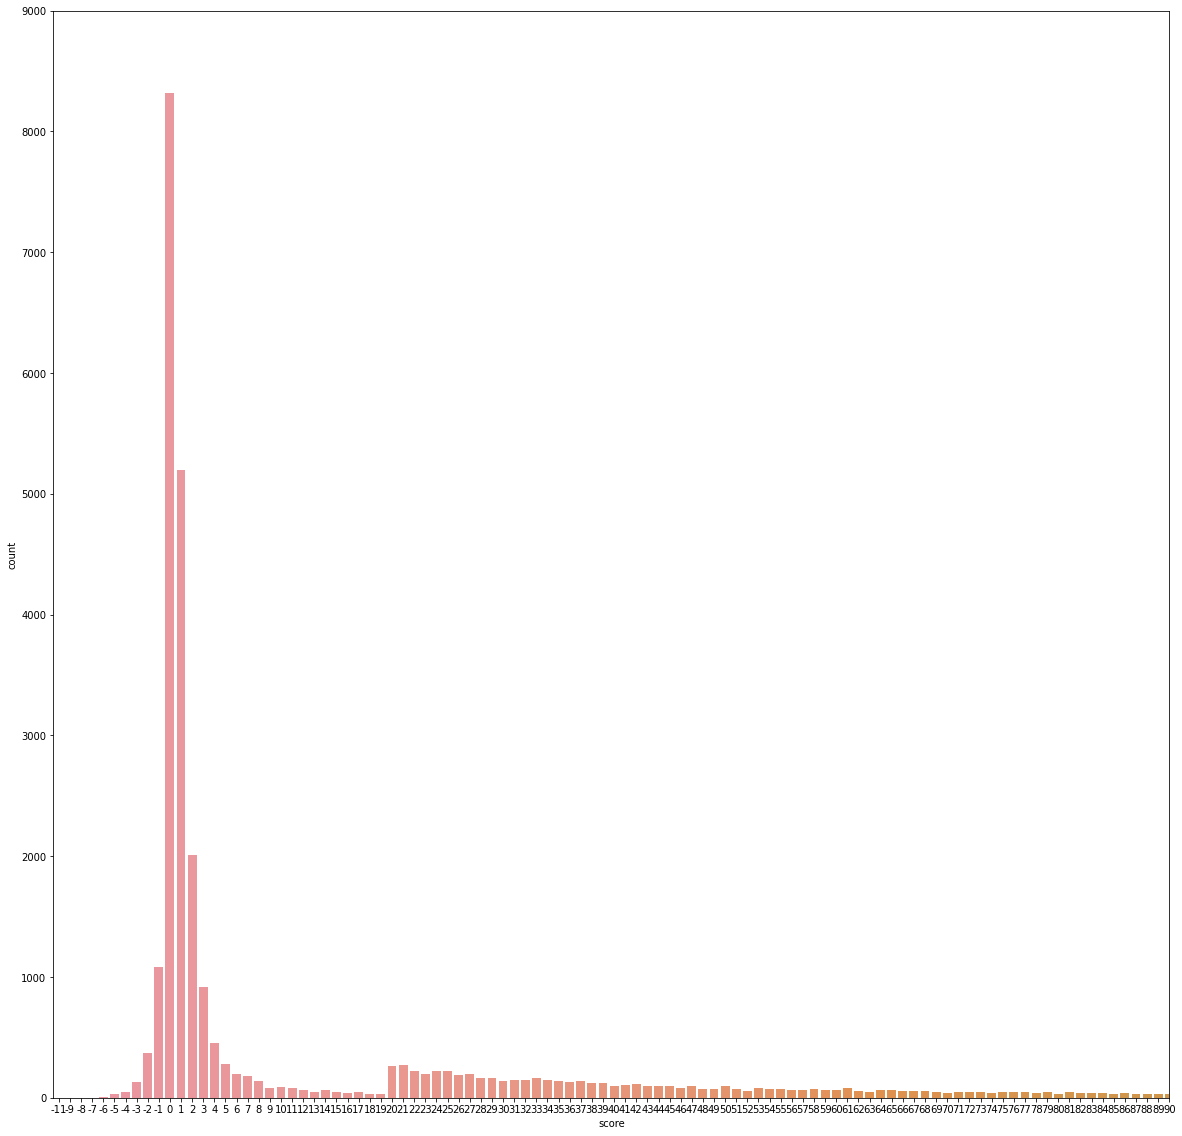

In [94]:
#### Histogram of distribution of outcome column "score"

f, ax = plt.subplots(figsize=(20,20))
sns.countplot(x='score', data=stackoverflow)
plt.xlim(None, 100) 
plt.ylim(0, 9000) 
plt.show()

In [95]:
### Cleaning the text

stopwords = nltk.corpus.stopwords.words('english')

In [96]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [97]:
### Prepare lemmatizer
lemmatizer = WordNetLemmatizer()

In [98]:
###  Define function that takes a whole sentence and outputs the lemmatized sentence.

def nltk2wn_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:                    
    return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
  wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
  res_words = []
  for word, tag in wn_tagged:
    if tag is None:                        
      res_words.append(word)
    else:
      res_words.append(lemmatizer.lemmatize(word, tag))
  return " ".join(res_words)

In [172]:
### Get rid of extras, and of code snippets split, and join 

def cleaner(x):
    x = re.sub(r'<code>.*?</code>', ' ', x.lower())
    x = re.sub(r'<p>', ' ', x)
    x = re.sub('[^a-z\s]', '', x)
    x = [w for w in x.split() if w not in stopwords]
    ## x = lemmatize_sentence(x) ## not sure how to make this work 
    return ' '.join(x)

In [173]:
test = "HI myself 3945p0hfnds, <code> grnkgljhkge </code>I am singing our testing arbitrary lkögeaf_fewnefwl %can't you're "
test2 = 'tags | tags | tags'

In [174]:
testnew = cleaner(test)
print(testnew)

hi phfnds singing testing arbitrary lkgeaffewnefwl cant youre


In [151]:
testnew2 = lemmatize_sentence(testnew)

print(testnew2)

hi phfnds sing test arbitrary lkgeaffewnefwl cant youre


In [122]:
### Separating target and text columns

excluded_cols = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'question_id', 'question_id_check', 'comment_count', 'creation_date', 'favorite_count', 'view_count', 'score', 'answer_count']
target_col = ['score_cat']
text_cols = [x for x in stackoverflow if x not in target_col + excluded_cols]

In [123]:
print(text_cols)

['question_title', 'question_text', 'tags', 'answer_text']


In [147]:
### Applying cleaning / preprocessing to all text columns

for var_name in text_cols:
    new_var = "%s_%s" % (var_name, "clean")
    stackoverflow[new_var] = stackoverflow[var_name].apply(cleaner)

In [128]:
### Define function to count 

def wordcounter(x):
    x = len(re.findall(r'\w+', x))
    return x 

In [130]:
### Feature extraction

stackoverflow['answer_wordcount'] = stackoverflow['answer_text_clean'].apply(wordcounter)

In [131]:
stackoverflow.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,score,question_id,question_id_check,question_title,question_text,answer_count,comment_count,...,favorite_count,tags,view_count,answer_text,score_cat,question_title_clean,question_text_clean,tags_clean,answer_text_clean,answer_wordcount
0,0,1262768,1262768,0,57627956,57627956,How to avoid Bot repeating command in groups?,<p>I created a new Telegram Bot which maintain...,2,0,...,0.0,telegram-bot|python-telegram-bot,79,"<p>The bot only is replying message, not creat...",bad,avoid bot repeating command groups,created new telegram bot maintains simple list...,telegrambotpythontelegrambot,bot replying message creating messagesp use se...,7
1,1,584060,584060,-3,61469635,61469635,how to host Asp.net core web application..?,<p>I have more confusion with hosting my appli...,2,0,...,NaN,asp.net-core|shared-hosting|cloud-hosting,47,<p>If choose their windows cloud hosting platf...,bad,host aspnet core web application,confusion hosting application build applicatio...,aspnetcoresharedhostingcloudhosting,choose windows cloud hosting platform net core...,23
2,2,1593780,1593780,0,60330818,60330818,discord.ext.commands.errors.MissingRequiredArg...,<p>i would like make a command for set permiss...,2,0,...,NaN,discord.py|discord.py-rewrite,103,"<p>What you're doing right now, is <strong>req...",bad,discordextcommandserrorsmissingrequiredargumen...,would like make command set permissions text c...,discordpydiscordpyrewrite,youre right strongrequiring guild argument com...,82
3,3,877874,877874,0,58685674,58685674,JPA not saving to DB on WildFly 16,<p>After migrating from Wildfly-8.2.0 to Wildf...,1,1,...,NaN,jpa|jakarta-ee|persistence|jpa-2.1|wildfly-16,22,"<p>What was missing is to add the ""eclipselink...",bad,jpa saving db wildfly,migrating wildfly wildfly jee application laun...,jpajakartaeepersistencejpawildfly,missing add eclipselinkjar file p wildflymodul...,18
4,4,1811675,1811675,0,60358924,60358924,Conditionally rendering an array within an arr...,<p>I've tried many of the methods outlined by ...,1,5,...,NaN,javascript|html|reactjs,40,<p>You need to trigger a re-render. This is do...,bad,conditionally rendering array within array wit...,ive tried many methods outlined users dice im ...,javascripthtmlreactjs,need trigger rerender done calling p cant tell...,88


In [35]:
# code for making pipeline?

# https://towardsdatascience.com/turbo-charge-your-spacy-nlp-pipeline-551435b664ad

# https://realpython.com/natural-language-processing-spacy-python/

In [39]:
### To Do

#### HELP WITH
# Fix cleaner function 
# Figure out no. of switches from code to explanation

# extract if answer has code yes / no
# do this step first to see if code existence matters, then possibly more complex counting of code-explanation switches

# extract tags into separate columns
# count length of answer (number of words)


In [37]:
### possibly useful for later

lemma_list = []
for token in tokens:
    if token.is_stop is False:
        token_preprocessed = preprocessor(token.lemma_)
        if token_preprocessed != '':
             lemma_list.append(token_preprocessed)
lemma_list

[]

In [33]:
tokens = []
lemma = []

for doc in nlp.pipe(stackoverflow['answer_text_nocode'].astype('unicode').values, batch_size=50, n_threads=3):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)

stackoverflow['answer_text_tokens'] = tokens
stackoverflow['answer_text_lemma'] = lemma

KeyError: 'answer_text_nocode'